<a href="https://colab.research.google.com/github/MaryamHashim/waw-tace-radiomics/blob/master/notebooks/RadiomicsSigNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Develop Your First Radiomics Signature on CT Images

a step-by-step, seamless experience as you learn to develop a radiomics signature on CT images using the WAW-TACE dataset. Follow the steps carefully to avoid common issues.

## Setting the computing environment

1.	Sign in to Google Colab https://colab.research.google.com/  in Google Chrome (optimized browser), create a new notebook, save it > now it will create a folder in your google drive called (Colab Notebooks)
Check location: Drive/My Drive/Colab Notebooks
2. sign in  Google Chrome> Google drive > Create a dedicated folder in Google Drive (e.g., Colab Notebooks/RadSignature).
3. GitHub Repository: Prepare the WAW-TACE-Radiomics GitHub Repository https://github.com/MaryamHashim/waw-tace-radiomics
4. Dataset: WAW-TACE Dataset Downloaded from Zenodo to your laptop> uncompress it > drag n drop into RadSignature folder in google drive
5. Check the number of files in each folder as follows:
ct_scans_1_4_wawtace_09_05_24 :  56 files
ct_scans_2_4_wawtace_09_05_24: 57 files
ct_scans_3_4_wawtace_09_05_24: 57 files
ct_scans_4_4_wawtace_09_05_24: 63 files
organ_masks_wawtace_09_05_2024: 233 files
tumor_masks_wawtace_v1_08_05_2024: 233 files
________________________________________





1. Set the Runtime> CPU
2. Clone the GitHub Repository

In [ ]:
!git clone https://github.com/MaryamHashim/waw-tace-radiomics.git

Cloning into 'waw-tace-radiomics'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 140 (delta 58), reused 102 (delta 34), pack-reused 0 (from 0)
Receiving objects: 100% (140/140), 2.45 MiB | 10.51 MiB/s, done.
Resolving deltas: 100% (58/58), done.


Navigate to the Correct Directory

In [ ]:
%cd waw-tace-radiomics/notebooks

/content/waw-tace-radiomics/notebooks


Verify the Library's Presence

In [ ]:
!ls

1_image_preprocessing_and_radiomic_feature_extraction.ipynb  Radiomics_Signature.ipynb
2_model_training.ipynb					     Radiomics_Signature_Model.ipynb
display_lib.py						     test_patients


Import the Library

In [ ]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 13.7 MB/s eta 0:00:00


In [ ]:
!pip install numpy

Run Your Code

In [ ]:
%%capture
%matplotlib inline

import SimpleITK as sitk
import numpy as np
from display_lib import VolumeDisplay, resample

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the image path to your Google Drive folder
image_path = "/content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_1_4_wawtace_09_05_24/10"

In [ ]:
# Define a patient identifier
patient_id = "10"

In [ ]:
# Create a dictionary relating different images or the mask to the path
image_paths = {
    "pre": f"{image_path}/{patient_id}_0_scan.nii.gz",  # Correct path without extra patient_id
    "arterial": f"{image_path}/{patient_id}_1_scan.nii.gz",  # Correct path without extra patient_id
    "portal": f"{image_path}/{patient_id}_2_scan.nii.gz",  # Correct path without extra patient_id
    "mask": f"/content/drive/My Drive/Colab Notebooks/RadSignature/tumor_masks_wawtace_v1_08_05_2024/{patient_id}/{patient_id}_2_0_tumor_seg.nrrd"  # Correct mask path
}

In [ ]:
image_paths["mask"] = "/content/drive/My Drive/Colab Notebooks/RadSignature/tumor_masks_wawtace_v1_08_05_2024/10/10_2_0_tumor_seg.nrrd"

In [ ]:
# Print paths again to verify correctness
print(f"Pre-scan path: {image_paths['pre']}")
print(f"Arterial scan path: {image_paths['arterial']}")
print(f"Portal scan path: {image_paths['portal']}")
print(f"Mask path: {image_paths['mask']}")

Pre-scan path: /content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_1_4_wawtace_09_05_24/10/10_0_scan.nii.gz
Arterial scan path: /content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_1_4_wawtace_09_05_24/10/10_1_scan.nii.gz
Portal scan path: /content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_1_4_wawtace_09_05_24/10/10_2_scan.nii.gz
Mask path: /content/drive/My Drive/Colab Notebooks/RadSignature/tumor_masks_wawtace_v1_08_05_2024/10/10_2_0_tumor_seg.nrrd


# How to Visualize Your Data Before Building a Radiomics Signature

In [ ]:
import SimpleITK as sitk

# Load the images and mask
arterial_image = sitk.ReadImage("/content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_1_4_wawtace_09_05_24/10/10_1_scan.nii.gz")
portal_image = sitk.ReadImage("/content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_1_4_wawtace_09_05_24/10/10_2_scan.nii.gz")
tumor_mask = sitk.ReadImage("/content/drive/My Drive/Colab Notebooks/RadSignature/tumor_masks_wawtace_v1_08_05_2024/10/10_2_0_tumor_seg.nrrd")

print("Arterial Image Size:", arterial_image.GetSize())
print("Portal Image Size:", portal_image.GetSize())
print("Tumor Mask Size:", tumor_mask.GetSize())

Arterial Image Size: (512, 512, 163)
Portal Image Size: (512, 512, 172)
Tumor Mask Size: (512, 512, 172)


interactive(children=(IntSlider(value=0, description='Slice index', max=162), ToggleButton(value=False, descri…

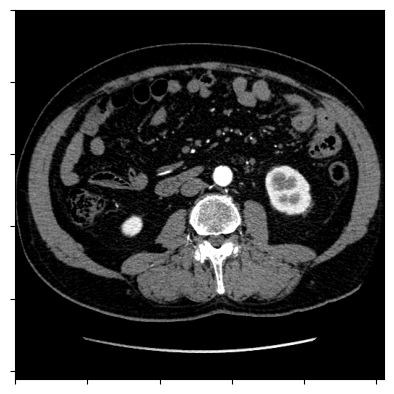

In [ ]:
# Use the volume displayer to visualize the scans
vol_display = VolumeDisplay(
    paths=[image_paths["arterial"], image_paths["portal"]],
    mask_path=image_paths["mask"]
)

vol_display()

Now we have visualized patient no 10, let's update the dataset_path to include all patients

Lets run a code to point to the correct path for the mask folder.

In [ ]:
import os

# Define the correct path to the mask folder
mask_base_dir = '/content/drive/My Drive/Colab Notebooks/RadSignature/tumor_masks_wawtace_v1_08_05_2024'

# Function to list all mask files
def list_mask_files(mask_base_dir):
    for root, dirs, files in os.walk(mask_base_dir):
        for file_name in files:
            if file_name.endswith(('.nii', '.nii.gz')):  # Adjust extensions as needed
                print(f'Mask file found: {os.path.join(root, file_name)}')

list_mask_files(mask_base_dir)

In [ ]:
# Print the directory structure to check accessibility
def check_directory_structure(mask_base_dir):
    print(f"Checking directory: {mask_base_dir}")
    for root, dirs, files in os.walk(mask_base_dir):
        print(f"Root: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Files: {files}")
        # If you find files in the directory, list them
        if files:
            for file_name in files:
                print(f"Found file: {file_name}")

check_directory_structure(mask_base_dir)

Checking directory: /content/drive/My Drive/Colab Notebooks/RadSignature/tumor_masks_wawtace_v1_08_05_2024
Root: /content/drive/My Drive/Colab Notebooks/RadSignature/tumor_masks_wawtace_v1_08_05_2024
Subdirectories: ['101', '10', '103', '102', '104', '108', '118', '112', '114', '111', '116', '115', '126', '121', '125', '119', '134', '13', '127', '135', '139', '14', '146', '144', '142', '149', '158', '150', '15', '16', '171', '167', '179', '165', '169', '168', '184', '19', '188', '18', '193', '2', '192', '197', '190', '198', '24', '23', '20', '21', '26', '29', '3', '28', '27', '25', '31', '310', '303', '304', '315', '324', '325', '326', '318', '319', '328', '330', '327', '33', '335', '333', '332', '334', '339', '338', '337', '342', '34', '336', '345', '347', '343', '344', '354', '35', '353', '351', '350', '349', '358', '356', '36', '360', '37', '366', '368', '363', '369', '367', '372', '373', '371', '370', '378', '379', '374', '375', '38', '380', '385', '383', '381', '382', '393', '390'

In [ ]:
import os # library to interact with the operating system
from pathlib import Path # library to work with paths

image_path = "/content/drive/My Drive/Colab Notebooks/RadSignature"
# this defines a path object which we will use to recursively search for volumes
dataset_path = Path(image_path)

patient_phase_dictionary = {}

# this will collect all the volumes.
# we know that the relevant volumes have "_scan" in their name, so we will be filtering accordingly.
for volume_path in dataset_path.rglob("*nii.gz"):
    volume_path = str(volume_path)
    if "_scan" in volume_path:
        patient_id = volume_path.split(os.sep)[-2]
        if patient_id not in patient_phase_dictionary:
            patient_phase_dictionary[patient_id] = {}
        phase_id = volume_path.split(os.sep)[-1].split("_")[-2]
        patient_phase_dictionary[patient_id][phase_id] = volume_path

for volume_path in dataset_path.rglob("*nrrd"):
    volume_path = str(volume_path)
    patient_id = volume_path.split(os.sep)[-2]
    if patient_id in patient_phase_dictionary:
        if "masks" not in patient_phase_dictionary[patient_id]:
            patient_phase_dictionary[patient_id]["masks"] = []
        patient_phase_dictionary[patient_id]["masks"].append(volume_path)

print("Length of patient dictionary:", len(patient_phase_dictionary))
print("Number of patients with pre-contrast phase:", len([k for k in patient_phase_dictionary if "0" in patient_phase_dictionary[k]]))
print("Number of patients with arterial phase:", len([k for k in patient_phase_dictionary if "1" in patient_phase_dictionary[k]]))
print("Number of patients with portal phase:", len([k for k in patient_phase_dictionary if "2" in patient_phase_dictionary[k]]))
print("Number of patients with late phase:", len([k for k in patient_phase_dictionary if "3" in patient_phase_dictionary[k]]))
print("Number of patients with masks:", len([k for k in patient_phase_dictionary if "masks" in patient_phase_dictionary[k]]))

print("Number of patients with arterial and portal phases and masks:",
      len([
          k for k in patient_phase_dictionary
          if "1" in patient_phase_dictionary[k] and "2" in patient_phase_dictionary[k] and "masks" in patient_phase_dictionary[k]]))

Length of patient dictionary: 233
Number of patients with pre-contrast phase: 200
Number of patients with arterial phase: 230
Number of patients with portal phase: 231
Number of patients with late phase: 193
Number of patients with masks: 233
Number of patients with arterial and portal phases and masks: 229


## After collecting all cases

OK, now that we have been able to inspect our cases, we will focus on performing a small set of operations anticipating the radiomics feature extraction:

1. **Identify a common spacing** - different centers or protocols will use different spacings. Small changes to this may not have an impact on how radiologists interpret CT studies, but are likely to affect radiomic features. As such, we start by extracting the relevant spacing information
2. **Identify the minimum pixel value** - some radiomic features and image transformations are not very appropriate for negative values. For this reason, we will be shifting all values in the image to be positive
3. **Identify which cases are missing which series types** - after having a loose understanding of image characteristics, we will finally understand which phases are available for each patient

### Extracting minimum intensity and spacing for all cases

In [ ]:
from tqdm import tqdm # this is a progress bar - helpful to see how we are doing!

arterial_min_filter = sitk.MinimumMaximumImageFilter()
portal_min_filter = sitk.MinimumMaximumImageFilter()
property_dictionary = {}

for patient in tqdm(patient_phase_dictionary):
    # check if both arterial and portal are available
    if "1" in patient_phase_dictionary[patient] and "2" in patient_phase_dictionary[patient]:
        arterial_path = patient_phase_dictionary[patient]["1"]
        portal_path = patient_phase_dictionary[patient]["2"]
        arterial_image, portal_image = sitk.ReadImage(arterial_path), sitk.ReadImage(portal_path)
        arterial_min_filter.Execute(arterial_image)
        portal_min_filter.Execute(portal_image)
        property_dictionary[patient] = {
            "Arterial": {
                "path": arterial_path,
                "spacing": arterial_image.GetSpacing(),
                "minimum": arterial_min_filter.GetMinimum()
            },
            "Portal": {
                "path": portal_path,
                "spacing": portal_image.GetSpacing(),
                "minimum": portal_min_filter.GetMinimum()
            }
        }

100%|██████████| 233/233 [27:34<00:00,  7.10s/it]


### Picking a in-plane spacing

Typically, there are variable in-plane and through-plane resolutions. So there is a necessity to standardise (or harmonize) this for radiomic feature extraction.

Now that we have the spacing information for all images we have to make a decision: we know we need a common spacing. But different spacings come with compromises:

- Picking the **minimum spacing** (highest resolution) - if this is applied to instances where the resolution is lower we will probably _create information_! By trying to increase the image resolution artificially, missing pixels and voxels are filled in with an educated guess. However, this can introduce biases!
- Picking the **maximum spacing** (lowest resolution) - if this is applied to instances where the resolution is higher we will probably _lose information_!
- Picking the **median spacing** - this is also intuitive, we try to achieve a compromise by upsampling some images and downsampling others. But we are still running a similar set of risks

Ultimately this is a matter of **protocol design**: there is no _a priori_ correct answer but consistency matters. In other words, while the ideal solution is hard to determine, we are OK as long as we are consistent.

To determine which method works best: empircally assess this for your use case! Maybe there is an ideal solution, maybe there isn't.

#### Our (heuristic) solution

Let's use the maximum spacing (lowest resolution). Since these tumours are relatively large, we should be losing little when we downsample them.

In [ ]:
arterial_spacing_array = np.array([property_dictionary[k]["Arterial"]["spacing"] for k in property_dictionary])
portal_spacing_array = np.array([property_dictionary[k]["Arterial"]["spacing"] for k in property_dictionary])

for q in [0, 0.5, 1.0]:
    print(f"Spacing at quantile={q} (arterial):",
          np.quantile(arterial_spacing_array, q, axis=0))
    print(f"Spacing at quantile={q} (portal):",
          np.quantile(portal_spacing_array, q, axis=0))

Spacing at quantile=0 (arterial): [0.54296899 0.54296899 0.5       ]
Spacing at quantile=0 (portal): [0.54296899 0.54296899 0.5       ]
Spacing at quantile=0.5 (arterial): [0.77929699 0.77929699 1.25      ]
Spacing at quantile=0.5 (portal): [0.77929699 0.77929699 1.25      ]
Spacing at quantile=1.0 (arterial): [1.07500005 1.07500005 5.        ]
Spacing at quantile=1.0 (portal): [1.07500005 1.07500005 5.        ]


### Picking a through-plane spacing

These images are not isometric (their spacing is not identical in all directions): only the xy (in-plane) spacing is identical, whereas the z (through-plane) spacing is different.

Is this yet another decision we have to make? 😱

Luckily, not really - while features can be extracted in 3 dimensions, we can force radiomic feature extraction to work with 2D features. This allows us to preserve the original through-plane spacing without introducing any biases from the resampling.

## Radiomic feature extraction

Now that we have a rough idea of the parameters necessary for radiomic feature extraction we can start extracting radiomic features!

First let's define constants for the minimum values and for the spacing we want to apply to our radiomic feature extraction.

In [ ]:
arterial_spacing = np.max(arterial_spacing_array, axis=0)[:2]
portal_spacing = np.max(portal_spacing_array, axis=0)[:2]
arterial_minimum_value = min([property_dictionary[k]["Arterial"]["minimum"] for k in property_dictionary])
portal_minimum_value = min([property_dictionary[k]["Portal"]["minimum"] for k in property_dictionary])

print("Arterial spacing:", arterial_spacing)
print("Portal spacing:", portal_spacing)
print("Arterial minimum value:", arterial_minimum_value)
print("Portal minimum value:", portal_minimum_value)

Arterial spacing: [1.07500005 1.07500005]
Portal spacing: [1.07500005 1.07500005]
Arterial minimum value: -10226.0
Portal minimum value: -4531.0


Now, we need to construct the radiomic settings file named YAML. This typically follows a structure like the following:

```
setting:
  binWidth: 25 # bin width for texture features
  label: 1 # label in the mask
  interpolator: 'sitkBSpline' # interpolation
  resampledPixelSpacing: [1.075, 1.075, 0.0] # specify here the pixel spacing
  force2D: true # forces 2D feature extraction

# Image transformations that are applied to the data
imageType:
  Original: {}

# Featureclasses, from which features must be calculated. If a featureclass is not mentioned, no features are calculated
# for that class. Otherwise, the specified features are calculated, or, if none are specified, all are calculated (excluding redundant/deprecated features).
featureClass:
  shape:
  firstorder:
  glcm:
  glrlm:
  glszm:
```

We can automatically generate this with a Python dictionary, which we will then save in YAML format. We have to adjust both the `resampledPixelSpacing` (spacing) and the `voxelArrayShift` (sum to the pixel values).

In [ ]:
import yaml
import os

# Define the initial parameters dictionary
params = {
    'imageType': {
        'Original': {},
    },
    'featureClass': {
        'firstorder': None,
        'shape': None,
        'glcm': None,
        'glrlm': None,
        'glszm': None,
        'gldm': None,
        'ngtdm': None,
    },
    'setting': {
        'binWidth': 25,
        'resampledPixelSpacing': [1.075, 1.075, 0.0],
        'voxelArrayShift': 2000,
        'force2D': True,
    }
}

# Replace these with the provided values
arterial_spacing = [1.07500005, 1.07500005]
portal_spacing = [1.07500005, 1.07500005]
arterial_minimum_value = -10226.0
portal_minimum_value = -4531.0

# Create copies of the template
params_arterial = params.copy()
params_portal = params.copy()

# Update arterial parameters
params_arterial["setting"]["resampledPixelSpacing"] = [*arterial_spacing, 0]  # Add 0 for z-dimension
params_arterial["setting"]["voxelArrayShift"] = int(arterial_minimum_value)

# Update portal parameters
params_portal["setting"]["resampledPixelSpacing"] = [*portal_spacing, 0]  # Add 0 for z-dimension
params_portal["setting"]["voxelArrayShift"] = int(portal_minimum_value)

# Create directory to store parameters
os.makedirs("params", exist_ok=True)

# Write arterial parameters to YAML file
with open("params/params-arterial.yaml", "w") as o:
    yaml.dump(params_arterial, o)

# Write portal parameters to YAML file
with open("params/params-portal.yaml", "w") as o:
    yaml.dump(params_portal, o)


In [ ]:
import os
print(os.getcwd())

/content/waw-tace-radiomics/notebooks


In [ ]:
!ls -l params

total 8
-rw-r--r-- 1 root root 267 Jan 28 21:16 params-arterial.yaml
-rw-r--r-- 1 root root 267 Jan 28 21:16 params-portal.yaml


### Finally extracting radiomic features!

In [ ]:
!pip install pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73

In [ ]:
from radiomics.featureextractor import RadiomicsFeatureExtractor
from radiomics import setVerbosity

setVerbosity(10)

In [ ]:
patient_phase_dictionary["86"]

{'1': '/content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_2_4_wawtace_09_05_24/86/86_1_scan.nii.gz',
 '2': '/content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_2_4_wawtace_09_05_24/86/86_2_scan.nii.gz',
 '3': '/content/drive/My Drive/Colab Notebooks/RadSignature/ct_scans_2_4_wawtace_09_05_24/86/86_3_scan.nii.gz',
 'masks': ['/content/drive/My Drive/Colab Notebooks/RadSignature/tumor_masks_wawtace_v1_08_05_2024/86/86_2_0_tumor_seg.nrrd']}

In [ ]:
masks = [sitk.ReadImage(mask) for mask in patient_phase_dictionary["86"]["masks"]]
mask = sitk.Cast(sum([resample(mask, masks[0],is_mask=True) for mask in masks]) > 0, sitk.sitkUInt32)

arterial_volume = sitk.ReadImage(patient_phase_dictionary["86"]["1"])
arterial_mask = resample(mask, arterial_volume, is_mask=True)

arterial_rfe = RadiomicsFeatureExtractor("params/params-arterial.yaml")
arterial_features = arterial_rfe.execute(arterial_volume, arterial_mask)

Loading parameter file params/params-arterial.yaml
INFO:radiomics.featureextractor:Loading parameter file params/params-arterial.yaml
Parameters parsed, input is valid.
DEBUG:radiomics.featureextractor:Parameters parsed, input is valid.
Applying settings
DEBUG:radiomics.featureextractor:Applying settings
Enabled image types: {'Original': {}}
DEBUG:radiomics.featureextractor:Enabled image types: {'Original': {}}
Enabled features: {'firstorder': None, 'glcm': None, 'gldm': None, 'glrlm': None, 'glszm': None, 'ngtdm': None, 'shape': None}
DEBUG:radiomics.featureextractor:Enabled features: {'firstorder': None, 'glcm': None, 'gldm': None, 'glrlm': None, 'glszm': None, 'ngtdm': None, 'shape': None}
Settings: {'binWidth': 25, 'force2D': True, 'resampledPixelSpacing': [1.07500005, 1.07500005, 0], 'voxelArrayShift': -4531}
DEBUG:radiomics.featureextractor:Settings: {'binWidth': 25, 'force2D': True, 'resampledPixelSpacing': [1.07500005, 1.07500005, 0], 'voxelArrayShift': -4531}
Calculating featu

In [ ]:
portal_volume = sitk.ReadImage(patient_phase_dictionary["86"]["2"])
portal_mask = resample(mask, portal_volume, is_mask=True)

portal_rfe = RadiomicsFeatureExtractor("params/params-portal.yaml")
portal_features = portal_rfe.execute(portal_volume, portal_mask)

Loading parameter file params/params-portal.yaml
INFO:radiomics.featureextractor:Loading parameter file params/params-portal.yaml
Parameters parsed, input is valid.
DEBUG:radiomics.featureextractor:Parameters parsed, input is valid.
Applying settings
DEBUG:radiomics.featureextractor:Applying settings
Enabled image types: {'Original': {}}
DEBUG:radiomics.featureextractor:Enabled image types: {'Original': {}}
Enabled features: {'firstorder': None, 'glcm': None, 'gldm': None, 'glrlm': None, 'glszm': None, 'ngtdm': None, 'shape': None}
DEBUG:radiomics.featureextractor:Enabled features: {'firstorder': None, 'glcm': None, 'gldm': None, 'glrlm': None, 'glszm': None, 'ngtdm': None, 'shape': None}
Settings: {'binWidth': 25, 'force2D': True, 'resampledPixelSpacing': [1.07500005, 1.07500005, 0], 'voxelArrayShift': -4531}
DEBUG:radiomics.featureextractor:Settings: {'binWidth': 25, 'force2D': True, 'resampledPixelSpacing': [1.07500005, 1.07500005, 0], 'voxelArrayShift': -4531}
Calculating features 

In [ ]:
from pprint import pprint

pprint(portal_features)

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.1'),
             ('diagnostics_Versions_Numpy', '1.26.4'),
             ('diagnostics_Versions_SimpleITK', '2.4.1'),
             ('diagnostics_Versions_PyWavelet', '1.8.0'),
             ('diagnostics_Versions_Python', '3.11.11'),
             ('diagnostics_Configuration_Settings',
              {'additionalInfo': True,
               'binWidth': 25,
               'distances': [1],
               'force2D': True,
               'force2Ddimension': 0,
               'interpolator': 'sitkBSpline',
               'label': 1,
               'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'padDistance': 5,
               'preCrop': False,
               'removeOutliers': None,
               'resampledPixelSpacing': [1.07500005, 1.07500005, 0],
               'resegmentRange': None,
               'voxelArrayShift': -4531}),
     

key operations and parameters being applied:

Parameter File Loading:

The YAML file params-arterial.yaml is successfully loaded, specifying parameters like bin width, resampling spacing, and features to extract.
Image and ROI (Region of Interest):

The mask is cast to UInt32 to ensure the correct data type.
Resampling is applied to match specified pixel spacing [1.075, 1.075, 1.25].
The bounding box for the ROI is computed, and its validity is confirmed.
Feature Classes:

Enabled feature classes: firstorder, shape, glcm, gldm, glrlm, glszm, and ngtdm.
Shape features like volume and surface area are calculated using the cropped mask.
First-order features are calculated with gray levels discretized into 56 bins (based on a bin width of 25).
Texture features such as GLCM, GLDM, and GLRLM matrices are computed, processed, and feature coefficients are derived.
Warnings and Validations:

A warning highlights that Sum Average in GLCM is symmetrical, reducing redundant calculations.
Checks confirm that the mask includes the correct label and meets minimum

## Conclusion

Here, we have learned how to programatically organize and preprocess data for visualization and radiomic feature extraction.

If you do not feel comfortable with using Python - that is perfectly fine! Computer software programs such as [3D Slicer](https://www.slicer.org/) feature [radiomic feature extraction](https://www.radiomics.io/slicerradiomics.html) plugins. This can also be automated as necessary, rendering these approaches widely applicable.

# Model training and tuning

Loading the data
We will use here the complete set of features from WAW-TACE as extracted in the previous section. We start by selecting the largest lesion and by filling in the lesion sizes for the 2nd and 3rd largest lesions (if available). For the rest of the data we will be using disease progression as our target.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# relevant paths and constants are defined here
clinical_data_target_path = "/content/drive/My Drive/Colab Notebooks/RadSignature/clinical_data_wawtace_v2_15_07_2024.xlsx"
arterial_feature_df_path = "../data/all_data_1.csv"
portal_feature_df_path = "../data/all_data_2.csv"
size_feature = "original_shape_VoxelVolume"

df_target = pd.read_excel(clinical_data_target_path)
dfs = {
    "Arterial": pd.read_csv(arterial_feature_df_path),
    "Portal": pd.read_csv(portal_feature_df_path),
}

new_df = {
    "Arterial": [],
    "Portal": []
}
for k in dfs:
    df = dfs[k]
    n = 0
    for patient in df["identifier"].unique():
        sub_df = df[df["identifier"] == patient].copy()
        if sub_df.shape[0] > 1:
            keep_lesion = sub_df.sort_values(size_feature).iloc[-1] # keep only last (largest)
            lesion_sizes = sorted(sub_df[size_feature])[:-1][::-1] # exclude last (largest)
            if len(lesion_sizes) == 1:
                lesion_sizes = [lesion_sizes[0], 0]
            keep_lesion["2nd_largest_size"] = lesion_sizes[0]
            keep_lesion["3nd_largest_size"] = lesion_sizes[1]
            sub_df = pd.DataFrame(keep_lesion).T
        else:
            sub_df.loc[:, "2nd_largest_size"] = 0
            sub_df.loc[:, "3nd_largest_size"] = 0
        cols_to_drop = ["phase", "mask_idx"]
        cols_to_drop.extend([x for x in sub_df.columns if "diagnostics" in x])
        sub_df.drop(cols_to_drop, inplace=True, axis=1)
        sub_df.columns = [f"{x}_{k}" if x != "identifier" else x for x in sub_df.columns]
        new_df[k].append(sub_df)
        n += 1

new_df["Arterial"] = pd.concat(new_df["Arterial"], axis=0)
new_df["Portal"] = pd.concat(new_df["Portal"], axis=0)

radiomics_df = pd.merge(new_df["Arterial"], new_df["Portal"])

In [ ]:
radiomics_df

,original_shape_Elongation_Arterial,original_shape_Flatness_Arterial,original_shape_LeastAxisLength_Arterial,original_shape_MajorAxisLength_Arterial,original_shape_Maximum2DDiameterColumn_Arterial,original_shape_Maximum2DDiameterRow_Arterial,original_shape_Maximum2DDiameterSlice_Arterial,original_shape_Maximum3DDiameter_Arterial,original_shape_MeshVolume_Arterial,original_shape_MinorAxisLength_Arterial,...,original_glszm_ZoneEntropy_Portal,original_glszm_ZonePercentage_Portal,original_glszm_ZoneVariance_Portal,original_ngtdm_Busyness_Portal,original_ngtdm_Coarseness_Portal,original_ngtdm_Complexity_Portal,original_ngtdm_Contrast_Portal,original_ngtdm_Strength_Portal,2nd_largest_size_Portal,3nd_largest_size_Portal
0,0.837296,0.694129,54.195568,78.077131,79.879112,93.033597,77.698041,93.45719,193403.671682,65.373647,...,5.616258,0.180583,415.923808,93.260333,0.000093,51.645535,0.012845,0.007815,0,0
1,0.838737,0.818634,46.809573,57.180091,73.55636,73.051887,57.740613,73.799475,89791.889899,47.959079,...,5.487772,0.254461,96.732914,13.912539,0.000288,97.450501,0.015114,0.045057,0,0
2,0.989452,0.672488,29.298201,43.566847,48.798465,51.302072,49.799312,53.420807,39108.183209,43.107303,...,5.050587,0.15402,868.864104,44.492427,0.000329,21.748154,0.014251,0.011753,11959.075928,5710.601807
3,0.662138,0.629182,49.464296,78.616849,71.669139,91.478372,79.06185,92.949463,131284.801981,52.055228,...,5.432544,0.182925,586.995045,138.452291,0.000036,62.640074,0.007465,0.00459,0,0
4,0.786807,0.651394,35.319262,54.221025,69.614301,51.345162,60.09433,69.821498,57874.668155,42.661484,...,5.463129,0.061421,10244.377787,5.266737,0.00066,602.055487,0.003179,13.980325,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.8959,0.599339,57.389109,95.754003,101.42708,105.897608,105.069913,108.759343,328140.77107,85.786,...,5.196633,0.09897,6636.242042,7.909368,0.000047,673.021055,0.000977,0.43372,0,0
222,0.605449,0.457891,33.286311,72.69476,62.173729,81.221184,55.087853,81.285185,69012.968102,44.01298,...,5.21707,0.237457,138.610414,66.090673,0.000219,34.279283,0.021247,0.008447,5488.395691,0
223,0.897425,0.816176,37.688055,46.176401,52.875704,50.927455,49.741264,56.419911,51643.260734,41.439871,...,5.271053,0.112288,1526.059444,59.459043,0.00035,14.078798,0.013597,0.009198,0,0
224,0.865186,0.688782,89.002259,129.216813,143.5778,137.65397,132.691763,153.037291,910509.067087,111.796579,...,5.921886,0.10892,3598.811068,202.577692,0.000007,144.305239,0.00254,0.005118,0,0


In [ ]:
target_var = "progression"

relevant_columns = [
    "age", # patient age
    "gender_woman", # whether patient identifies as woman
    "etiology_mixed", # whether tumor etiology is mixed
    "etiology_HCV", # whether tumor etiology is hep C
    "etiology_HBV", # whether tumor etiology is hep B
    "etiology_alcoholic", # whether tumor etiology is alcoholic
    "etiology_NASH", # whether tumor etiology is nonalcoholic steatohepatitis
    "etiology_cryptogenic", # whether etiology is unknown
    "lab_albumin", # albumin concentration
    "lab_creatinine", # creatinine concentration
    "lab_bilirubin", # bilirubin concentration
    "lab_afp", # alfa-fetoprotein concentration
    "lab_inr", # prothrombin international normalised ratio
    "lab_alt", # alanine aminotransferase
    "lesion1_diameter", # largest lesion diameter
    "lesion2_diameter", # 2nd largest lesion diameter
    "lesion3_diameter", # 3rd largest lesion diameter
    "lesion1_LIRADS", # largest lesion LI-RADS
    "lesion2_LIRADS", # 2nd largest lesion LI-RADS
    "lesion3_LIRADS", # 3nd largest lesion LI-RADS
    # combined positive score (PD-L1 positive cells / viable tumour cells)
    "cps",
    # Barcelona clinic liver cancer score (number and size of tumours, general health and fitness, liver function)
    "bclc",
    # HAP score (albumin, bilirubin, AFP, tumour size)
    "hap_score",
    # modified hepatoma arterial embolisation prognostic II (HAP + tumour number)
    "mhap_2",
    # albumin and bilirubin, tumour size * number of tumours
    "albi_tae",
    # 6 and 12 score (tumour size, number of tumours)
    "6_12_score",
]

df_target_processed = df_target[["PATPRI", *relevant_columns, target_var]].copy()
df_target_processed["identifier"] = df_target_processed["PATPRI"]
df_target_processed["class"] = df_target_processed[target_var]
df_target_processed = df_target_processed.drop(["PATPRI", target_var],axis=1)
df_class = df_target_processed.loc[:, ["identifier", "class"]]
df_clinical = df_target_processed.drop(["class"],axis=1)
for k in ["lesion2_diameter", "lesion3_diameter", "lesion2_LIRADS", "lesion3_LIRADS"]:
    if k in df_clinical:
        df_clinical[k] = df_clinical[k].fillna(0)

for k in ["lesion1_LIRADS"]:
    if k in df_clinical:
        df_clinical[k] = np.where(df_clinical[k] == "M", 6, df_clinical[k])

df_clinical = df_clinical.dropna(axis=0)

In [ ]:
generate_test_set = False

if generate_test_set is True:
    test_set_size = 0.25
    from sklearn.model_selection import train_test_split

    with open("test_patients", "w") as o:
        ids = df_class["identifier"].astype(str).tolist()
        classes = df_class["class"].tolist()
        train_split, test_split = train_test_split(
            ids,
            test_size=test_set_size,
            random_state=42,
            stratify=classes)
        print(len(train_split), len(test_split))
        o.write("\n".join(test_split))

Make data splits
Here, we are setting aside 25% of the data for a hold-out test set. We will not touch the hold-out test data except for the actual testing at the end!

In [ ]:
with open("test_patients") as o:
    test_patients = [x.strip() for x in o.readlines()]

full_df = pd.merge(
    pd.merge(radiomics_df, df_class),
    df_clinical)

train_full_df = full_df[~np.in1d(full_df.identifier.astype(str), test_patients)]

train_radiomics_df = train_full_df.drop(relevant_columns, axis=1)
train_clinical_df = train_full_df[["identifier", *relevant_columns, "class"]]

Now is also a good time to assess how the target is distributed between negative and positive cases (no progression and progression, respectively).

In [ ]:
train_clinical_df["class"].value_counts()

,count
class,
0,129
1,41


Here he data is somewhat unbalanced (1 progressor for every 3 non-progressors). This can make the application of metrics which do not consider this (i.e. accuracy) a bit tricky!

Inspecting the data - minimal exploratory data analysis
Let us now take the time to plot the data and some of the features and see how they are distributed. Here, we will pick the features showing the highest association with our target variable according to a t-test.

In [ ]:
from scipy import stats # library to perform statistics in Python

ttest_results = {}
target = train_radiomics_df["class"]
for x in train_radiomics_df:
    if x not in ["identifier", "phase", "mask_idx", "class"]:
        feature = train_radiomics_df[x]
        ttest_result = stats.ttest_ind(
            feature[target == 0].astype(float),
            feature[target == 1].astype(float))
        if ttest_result.pvalue < 0.05:
            ttest_results[x] = ttest_result.statistic

ttest_results_clinical = {}
target = train_clinical_df["class"]
for x in train_clinical_df:
    if x not in ["identifier", "class"] and "etiology" not in x:
        feature = train_clinical_df[x]
        ttest_result = stats.ttest_ind(
            feature[target == 0].astype(float),
            feature[target == 1].astype(float))
        if ttest_result.pvalue < 0.05:
            ttest_results_clinical[x] = ttest_result.statistic

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


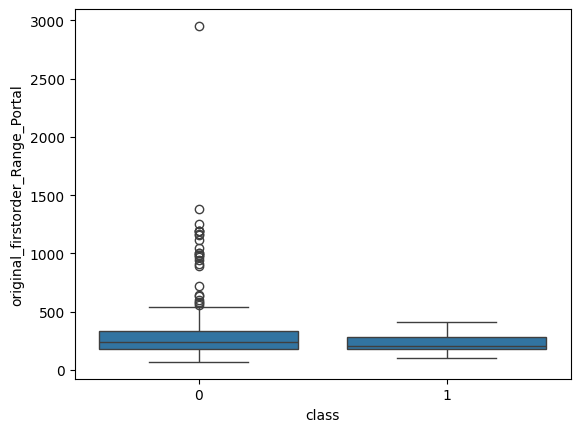

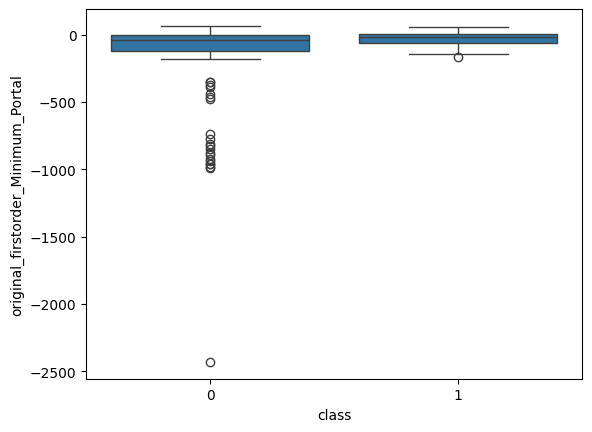

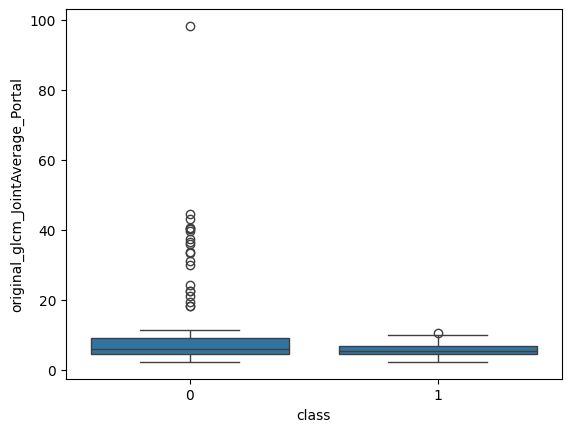

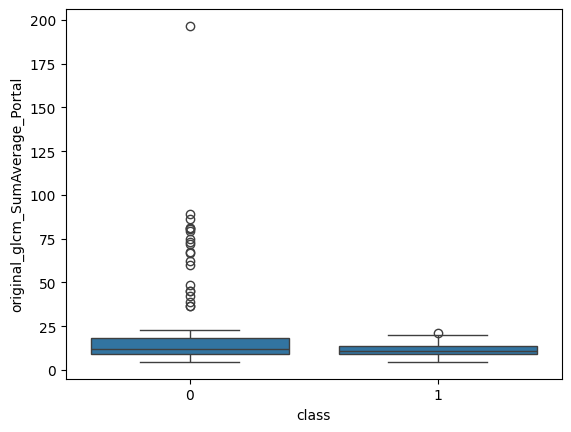

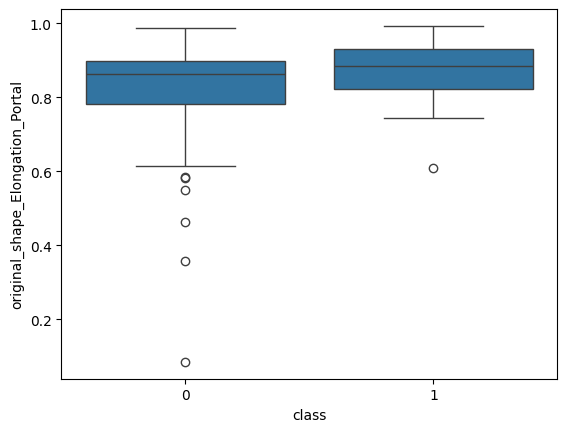

In [ ]:
import seaborn as sbn # plotting library
import matplotlib.pyplot as plt

top_n = 5

ttest_results_sorted = sorted(ttest_results.keys(), key=lambda k: -ttest_results[k] ** 2)

for key in ttest_results_sorted[:top_n]:
    sbn.boxplot(x="class", y=key, data=train_radiomics_df)
    plt.show()

We now do the same for the clinical features. Clearly we see there are more radiomics features which are associated with the target variable - this could be a good indication!

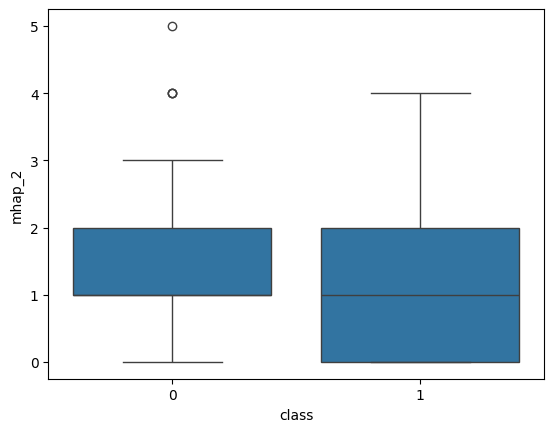

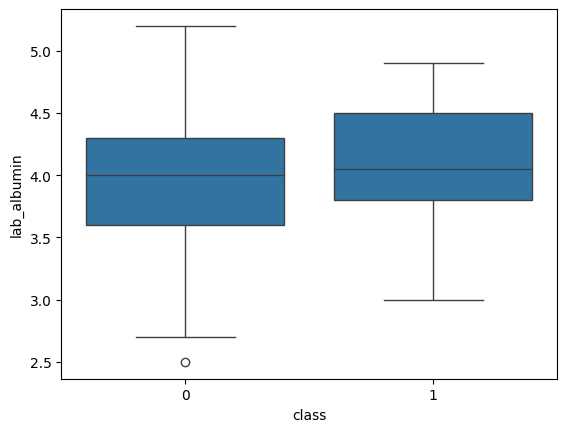

In [ ]:
ttest_results_sorted = sorted(ttest_results_clinical.keys(), key=lambda k: -ttest_results_clinical[k] ** 2)

for key in ttest_results_sorted[:top_n]:
    sbn.boxplot(x="class", y=key, data=train_clinical_df)
    plt.show()

Building our model
Here we will define a pipeline (Pipeline) containing a set of components which we have previously discussed are aluded to:

VarianceThreshold will (mostly) remove constant features
StandardScaler will scale the data such that each feature has (Mue=0)
 and (Segma=1)
RandomForestClassifier will be our random forest classifier
We will first assess the expected performance of our method for hyperparameter selection using nested cross-validation. We will be performing this for three distinct feature sets:

1. Radiomics
2. Clinical (all of the clinical features)
3. Radclin (radiomics and clinical features)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from scipy.stats import randint

df_dict = {
    "radiomics": train_radiomics_df,
    "clinical": train_clinical_df,
    "full": train_full_df,
}
results = {}
inner_folds = 5
outer_folds = 5

for key in df_dict:
    np.random.seed(42)
    params = {
        "model__n_estimators": randint(5, 100),
        "model__max_depth": randint(5, 20)
    }
    pipeline = Pipeline(
        [("variance_threshold", VarianceThreshold()),
         ("scaler", StandardScaler()),
         ("model", RandomForestClassifier(
             class_weight="balanced",
             random_state=42))]
    )
    curr_df = df_dict[key]
    print(f"Training with {key} data (shape={curr_df.shape})")
    X = curr_df.drop("class", axis=1).astype(np.float32).to_numpy()
    y = curr_df["class"].to_numpy()

    inner_cv = StratifiedKFold(
        n_splits=inner_folds, shuffle=True, random_state=42)
    outer_cv = StratifiedKFold(
        n_splits=outer_folds, shuffle=True, random_state=42)

    inner_model = RandomizedSearchCV(
        pipeline, params, cv=inner_cv, n_iter=100, scoring="roc_auc",
        random_state=42)
    nested_score = cross_validate(
        inner_model,
        X=X,
        y=y,
        cv=outer_cv,
        scoring="roc_auc",
        verbose=2,
        return_estimator=True,
        n_jobs=min([outer_folds, 7]),
        )

    results[key] = nested_score

    print(key, np.mean(results[key]["test_score"]))

Training with radiomics data (shape=(170, 220))


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  5.3min remaining:  7.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  5.3min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


radiomics 0.7080619658119659
Training with clinical data (shape=(170, 28))


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  4.2min remaining:  6.2min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  4.2min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


clinical 0.5398547008547008
Training with full data (shape=(170, 246))


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  5.0min remaining:  7.5min


full 0.6505405982905983


[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  5.0min finished


<Axes: xlabel='AUC', ylabel='Features'>

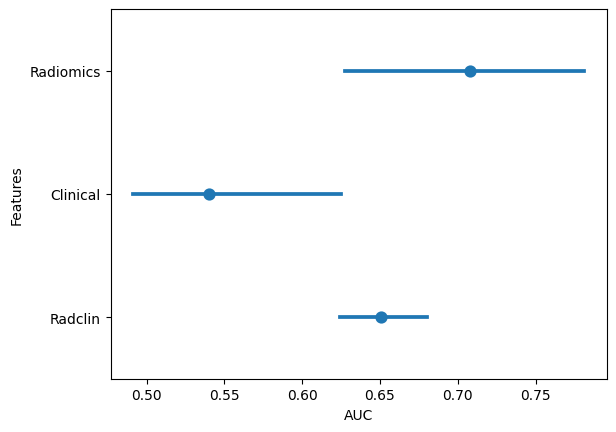

In [ ]:
results_df = pd.DataFrame(
    {"AUC": np.concatenate([
        results['radiomics']['test_score'],
        results['clinical']['test_score'],
        results['full']['test_score']
        ]),
     "Features": np.concatenate(
        [["Radiomics" for _ in range(outer_folds)],
         ["Clinical" for _ in range(outer_folds)],
         ["Radclin" for _ in range(outer_folds)]])}
     )

sbn.pointplot(x="AUC", y="Features", data=results_df, linestyle='')

In [ ]:
from scipy import stats

print("Radiomics vs. clinical:", stats.ttest_ind(results["radiomics"]["test_score"], results["clinical"]["test_score"]))
print("Radiomics+clinical vs. clinical:", stats.ttest_ind(results["full"]["test_score"], results["clinical"]["test_score"]))
print("Radiomics vs. radiomics+clinical:", stats.ttest_ind(results["radiomics"]["test_score"], results["full"]["test_score"]))

Radiomics vs. clinical: TtestResult(statistic=2.7748709804334757, pvalue=0.024114684284166618, df=8.0)
Radiomics+clinical vs. clinical: TtestResult(statistic=2.4316442397877522, pvalue=0.041096694330042004, df=8.0)
Radiomics vs. radiomics+clinical: TtestResult(statistic=1.244359043496507, pvalue=0.2485871093164487, df=8.0)


In [ ]:
import joblib # here we are using this library to save our model
import os

os.makedirs("model", exist_ok=True)
joblib.dump(results, "model/all_models.joblib")

['model/all_models.joblib']

Excellent! We appear to have an improvement on progression prediction both using radiomic features and using all features (clinical and radiomics).

We are only missing one last part of our approach: validating our models on our hold-out test set.

### Validation

In [ ]:
test_full_df = full_df[np.in1d(full_df.identifier.astype(str), test_patients)]

test_radiomics_df = test_full_df.drop(relevant_columns, axis=1)
test_clinical_df = test_full_df[["identifier", *relevant_columns, "class"]]

In [ ]:
from sklearn.metrics import roc_auc_score

test_df_dict = {
    "radiomics": test_radiomics_df,
    "clinical": test_clinical_df,
    "full": test_full_df,
}

for key in test_df_dict:
    curr_df = test_df_dict[key]
    X = curr_df.drop("class", axis=1).astype(np.float32).to_numpy()
    y = curr_df["class"].to_numpy()

    probas = [estimator.predict_proba(X)[:, 1]
              for estimator in results[key]["estimator"]]
    probas = np.array(probas).mean(0)

    predictions = [estimator.predict(X)
                   for estimator in results[key]["estimator"]]
    predictions = np.array(predictions).mean(0) > 0.5

    print(
        f"{key}: ROC={roc_auc_score(y, probas)}"
    )

radiomics: ROC=0.6846689895470384
clinical: ROC=0.5209059233449478
full: ROC=0.6829268292682926


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

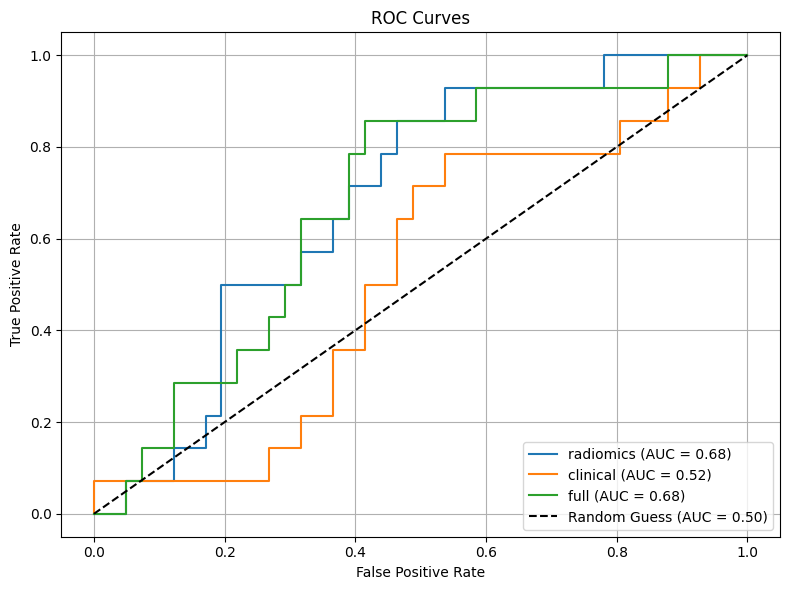

In [ ]:
# Iterate through the test dictionaries and plot ROC curves
plt.figure(figsize=(8, 6))

for key in test_df_dict:
    curr_df = test_df_dict[key]
    X = curr_df.drop("class", axis=1).astype(np.float32).to_numpy()
    y = curr_df["class"].to_numpy()

    # Calculate probabilities and predictions
    probas = [estimator.predict_proba(X)[:, 1] for estimator in results[key]["estimator"]]
    probas = np.array(probas).mean(0)

    # Compute the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y, probas)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{key} (AUC = {roc_auc:.2f})")

# Plot aesthetics
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

Interpreting the ROC curve figure involves assessing the model's performance in distinguishing between the positive and negative classes.

Curve Shape:

A curve closer to the top-left corner indicates better performance. This suggests a high True Positive Rate (TPR) and a low False Positive Rate (FPR).
A curve along the diagonal line (from bottom-left to top-right) indicates random guessing, with no discrimination between classes (AUC = 0.5).
Area Under the Curve (AUC):

AUC = 1: Perfect classification.
AUC > 0.8: Excellent performance.
AUC between 0.7–0.8: Acceptable or moderate performance.
AUC < 0.7: Poor performance, suggesting the model struggles to distinguish between classes.

at this example Radiomics: If the radiomics curve is closer to the top-left and has a higher AUC (e.g., 0.68), this suggests moderate discriminatory power for the radiomics-based model.
Clinical: If the clinical model’s ROC curve is near the diagonal line and its AUC is close to 0.51, it performs only slightly better than random guessing.
Full: If the "full" model (combining radiomics and clinical features) has an AUC close to the radiomics model, it suggests that the addition of clinical features does not significantly improve the model.

### Plot Sensitivity vs Specifisity


What does it mean? ☕
Sensitivity (True Positive Rate): The proportion of actual positives correctly identified.
Specificity: The proportion of actual negatives correctly identified.
Specificity=1−False Positive Rate.

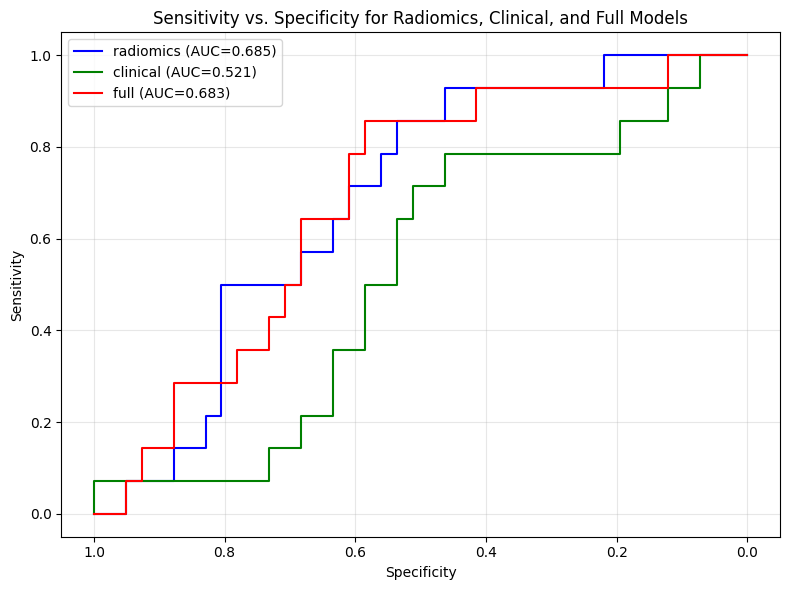

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Example dictionary for ROC-AUC results
test_df_dict = {
    "radiomics": test_radiomics_df,
    "clinical": test_clinical_df,
    "full": test_full_df,
}

# Define colors for each model
model_colors = {
    "radiomics": "blue",
    "clinical": "green",
    "full": "red"
}
# Create the figure
plt.figure(figsize=(8, 6))

for key in test_df_dict:
    curr_df = test_df_dict[key]
    X = curr_df.drop("class", axis=1).astype(np.float32).to_numpy()
    y = curr_df["class"].to_numpy()

    # Predict probabilities
    probas = [estimator.predict_proba(X)[:, 1] for estimator in results[key]["estimator"]]
    probas = np.array(probas).mean(0)

    # Calculate sensitivity and 1-specificity
    fpr, tpr, thresholds = roc_curve(y, probas)
    specificity = 1 - fpr  # Convert FPR to specificity

    # Plot sensitivity vs. specificity
    plt.plot(specificity, tpr, label=f"{key} (AUC={roc_auc_score(y, probas):.3f})", color=model_colors[key])

# Add labels and legend
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.title("Sensitivity vs. Specificity for Radiomics, Clinical, and Full Models")
plt.legend()
plt.grid(alpha=0.3)
plt.gca().invert_xaxis()  # Invert the x-axis for specificity
plt.tight_layout()
# Show the plot
plt.show()